In [1]:
import set_lib_path

import pandas as pd
import os
import seaborn as sns

from src.model.results import load_results, unpivot_results

In [2]:
data_path = '../../data'
file_1 = os.path.join(data_path, 'managed_data_files/AAA/sample_output/6_hours_frequency_1min.csv')
file_2 = os.path.join(data_path, 'managed_data_files/AAA/sample_output/6_hours_frequency_5min.csv')

In [3]:
results_1 = unpivot_results(load_results(file_1))
results_2 = unpivot_results(load_results(file_2))

In [4]:
results_1['frequency'] = '1-min'
results_2['frequency'] = '5-min'

results = pd.concat([results_1, results_2])

In [5]:
results.dtypes

street_object_id                  int64
timestamp           datetime64[ns, UTC]
modality                         object
density                         float64
frequency                        object
dtype: object

In [6]:
street_ids = results['street_object_id'].unique()[:25]

In [7]:
subset = results[results['street_object_id'].isin(street_ids)]

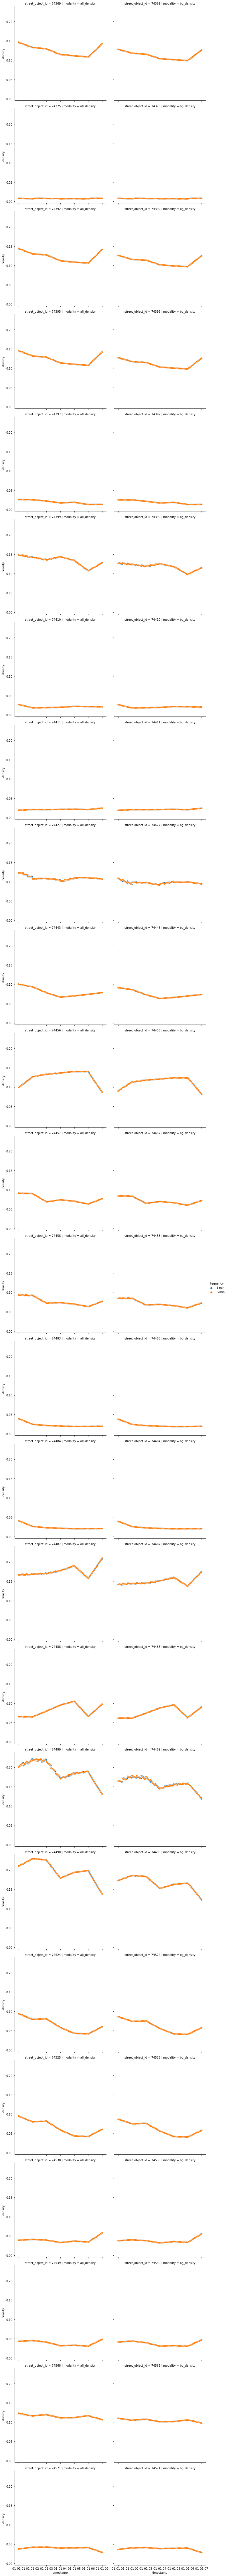

In [8]:
sns.relplot(data=subset, x='timestamp', y='density', row='street_object_id', col='modality', hue='frequency')